<a href="https://colab.research.google.com/github/roshanappa/Deep-Learning-Models./blob/master/Malaria_Detection_By_using_the_CNN2D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,BatchNormalization,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 29.56 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [0]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.20)

In [0]:
train_data = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(64,64),class_mode='binary',classes=['Parasitized','Uninfected'],batch_size=30,subset='training')

Found 22048 images belonging to 2 classes.


In [0]:
validation_data = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(64,64),class_mode='binary',classes=['Parasitized','Uninfected'],batch_size=30,subset='validation')

Found 5510 images belonging to 2 classes.


In [0]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
train_data.image_shape

(64, 64, 3)

## Model.

In [0]:
model = Sequential()
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[64,64,3]))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model.fit_generator(train_data,steps_per_epoch=len(train_data),epochs=10,verbose=1,validation_data=validation_data,validation_steps=len(validation_data))

Epoch 1/10
735/735 [==============================] - 48s 65ms/step - loss: 0.7461 - accuracy: 0.5693 - val_loss: 0.6804 - val_accuracy: 0.6113
Epoch 2/10
735/735 [==============================] - 48s 65ms/step - loss: 0.6287 - accuracy: 0.6393 - val_loss: 0.4366 - val_accuracy: 0.9201
Epoch 3/10
735/735 [==============================] - 48s 65ms/step - loss: 0.2155 - accuracy: 0.9347 - val_loss: 0.2944 - val_accuracy: 0.9312
Epoch 4/10
735/735 [==============================] - 48s 65ms/step - loss: 0.1585 - accuracy: 0.9506 - val_loss: 0.2536 - val_accuracy: 0.9392
Epoch 5/10
735/735 [==============================] - 48s 65ms/step - loss: 0.1383 - accuracy: 0.9570 - val_loss: 0.2236 - val_accuracy: 0.9325
Epoch 6/10
735/735 [==============================] - 48s 65ms/step - loss: 0.1365 - accuracy: 0.9570 - val_loss: 0.2778 - val_accuracy: 0.9247
Epoch 7/10
735/735 [==============================] - 48s 65ms/step - loss: 0.1309 - accuracy: 0.9590 - val_loss: 0.2031 - val_accuracy:

In [0]:
history.history

{'accuracy': [0.5692579746246338,
  0.639286994934082,
  0.9347333312034607,
  0.9505624175071716,
  0.9569575190544128,
  0.9570028781890869,
  0.9589532017707825,
  0.9595881700515747,
  0.9606767296791077,
  0.9619920253753662],
 'loss': [0.7460522055625916,
  0.6287058591842651,
  0.21549421548843384,
  0.15851633250713348,
  0.13833503425121307,
  0.13653802871704102,
  0.13092002272605896,
  0.1267138570547104,
  0.12492359429597855,
  0.11956644803285599],
 'val_accuracy': [0.6112522482872009,
  0.9201452136039734,
  0.9312159419059753,
  0.9392014741897583,
  0.9324864149093628,
  0.9246823787689209,
  0.9377495646476746,
  0.92867511510849,
  0.9252268671989441,
  0.9386569857597351],
 'val_loss': [0.680410623550415,
  0.43661004304885864,
  0.29439833760261536,
  0.2536327838897705,
  0.22355690598487854,
  0.2778429388999939,
  0.20306196808815002,
  0.22653265297412872,
  0.22015735507011414,
  0.19503332674503326]}

## Learning Curve.

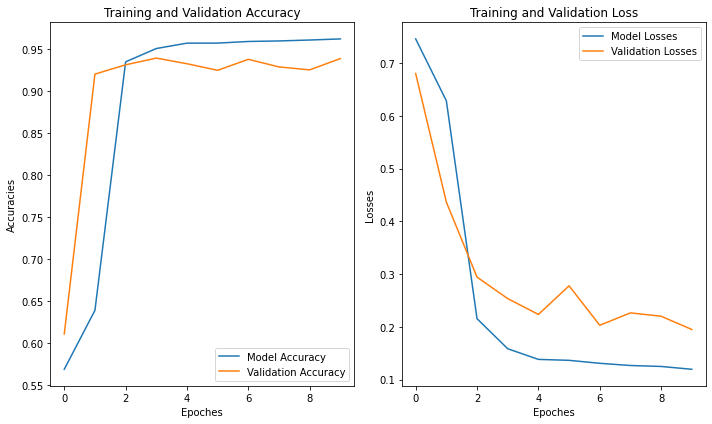

In [0]:

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Model Accuracy','Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Accuracies')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Model Losses','Validation Losses'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Losses')
plt.tight_layout()
plt.show()

## Accuarcy,Confusion Matrix and Classification Report.

In [0]:
augmented_images = [train_data[0][0][0] for i in range(len(train_data))]

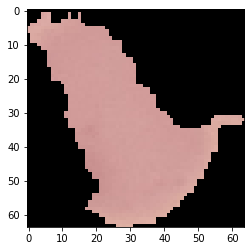

In [0]:
plt.imshow(augmented_images[88])
plt.show()

## Prediction Image:-



In [0]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

 Again One more time.

In [105]:
image = load_img('/content/cell1.png',target_size=(64,64))
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
result = model.predict(image)
np.argmax(result)

0

In [107]:
im = load_img('/content/vvvv.jpg',target_size=(64,64))
im = img_to_array(im)
im = np.expand_dims(im,axis=0)
prediction_result = model.predict(im)
np.argmax(prediction_result)

0

In [102]:
img = load_img('/content/MalariaCellsv.jpg',target_size=(64,64))
img = img_to_array(img)
img = np.expand_dims(img,axis=0)
prediction = model.predict_classes(img)
prediction

array([[0]], dtype=int32)

## Thank You !!